In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import pymap3d as pm

In [17]:
df = pd.read_csv("ntrip_before_and_after.csv")
df = df.assign(UTC = pd.to_datetime(df.UTC))

In [20]:
startTime = "2020-04-23 05:48:50"
endTime = "2020-04-23 05:56:40"
df_slice = df[df["UTC"] > startTime]
df_slice = df_slice[df_slice["UTC"] < endTime]

In [23]:
lat_origin = np.mean(df_slice.Lat)
lon_origin = np.mean(df_slice.Lon)
height_origin = np.mean(df_slice["Alt (MSL)"].values)

east, north, up = pm.geodetic2enu(df_slice.Lat, df_slice.Lon, df_slice["Alt (MSL)"].values, lat_origin, lon_origin, height_origin)
df_slice = df_slice.assign(east = east)
df_slice = df_slice.assign(north = north)
df_slice = df_slice.assign(up = up)
df_slice = df_slice.assign(displacement = np.sqrt(np.square(east) + np.square(north) + np.square(up)))

In [33]:
WINSIZE = 60

df_slice = df_slice.assign(std_disp_roll = df_slice["displacement"].rolling(WINSIZE).std())
df_slice = df_slice.assign(std_disp_grow = df_slice["displacement"].expanding(WINSIZE).std())
df_slice = df_slice.assign(std_indiv_roll =
                          np.sqrt(np.square(east.rolling(WINSIZE).std()) 
                                  + np.square(north.rolling(WINSIZE).std()) 
                                  + np.square(up.rolling(WINSIZE).std())))
df_slice = df_slice.assign(std_indiv_grow =
                          np.sqrt(np.square(east.expanding(WINSIZE).std()) 
                                  + np.square(north.expanding(WINSIZE).std()) 
                                  + np.square(up.expanding(WINSIZE).std())))

In [34]:
df_slice

Index                 UTC        Lat        Lon  Alt (MSL)  PACC H  \
125    125 2020-04-23 05:48:51  40.804518 -73.965290       69.6   3.399   
126    126 2020-04-23 05:48:52  40.804518 -73.965290       69.7   3.327   
127    127 2020-04-23 05:48:53  40.804518 -73.965290       69.7   3.254   
128    128 2020-04-23 05:48:54  40.804517 -73.965290       69.8   3.184   
129    129 2020-04-23 05:48:55  40.804517 -73.965291       69.8   3.122   
..     ...                 ...        ...        ...        ...     ...   
589    589 2020-04-23 05:56:35  40.804522 -73.965293       65.1   0.020   
590    590 2020-04-23 05:56:36  40.804522 -73.965293       65.1   0.020   
591    591 2020-04-23 05:56:37  40.804522 -73.965293       65.1   0.021   
592    592 2020-04-23 05:56:38  40.804522 -73.965293       65.1   0.020   
593    593 2020-04-23 05:56:39  40.804522 -73.965293       65.1   0.020   

     PACC 3D  PDOP      east     north        up  displacement  std_disp  \
125    4.080   2.3  0.431174  0.940117  0.961834      1.412394       NaN   
126    4.000   2.3  0.416829  0.903470  1.061834      1.455162       NaN   
127    3.921   2.3  0.403328  0.884591  1.061834      1.439676       NaN   
128    3.844   2.3  0.388982  0.829066  1.161834      1.479363       NaN   
129    3.775   2.3  0.374637  0.773540  1.161834      1.445190       NaN   
..       ...   ...       ...       ...       ...           ...       ...   
589    0.035   1.7  0.205868  1.347675 -3.538166      3.791732  0.072683   
590    0.034   1.6  0.205868  1.328796 -3.538166      3.785063  0.068924   
591    0.034   1.6  0.205868  1.347675 -3.538166      3.791732  0.063845   
592    0.034   1.6  0.205868  1.347675 -3.538166      3.791732  0.056786   
593    0.034   1.6  0.205868  1.347675 -3.538166      3.791732  0.049070   

     std_disp_roll  std_disp_grow  std_indiv_roll  std_indiv_grow  
125            NaN            NaN             NaN             NaN  
126            NaN            NaN             NaN             NaN  
127            NaN            NaN             NaN             NaN  
128            NaN            NaN             NaN             NaN  
129            NaN            NaN             NaN             NaN  
..             ...            ...             ...             ...  
589       0.304334       1.477019        0.334812        3.223223  
590       0.305983       1.476050        0.337537        3.224609  
591       0.306986       1.475090        0.339383        3.225984  
592       0.307551       1.474131        0.340719        3.227332  
593       0.307280       1.473173        0.341061        3.228653  

[469 rows x 17 columns]

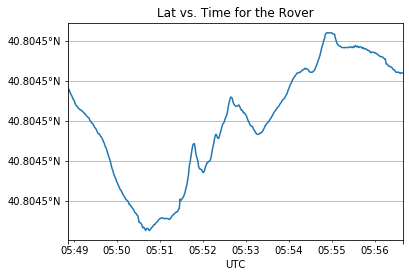

In [35]:
# Substitute "Lat" for your choice of column
col_to_plot = "Lat"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_slice.plot("UTC", col_to_plot, title = col_to_plot+" vs. Time for the Rover", legend=False, grid=True)

# Get Current Axes
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
#ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
#ax.xaxis_date()

# Uncomment this line to format a latitude axis
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.show()

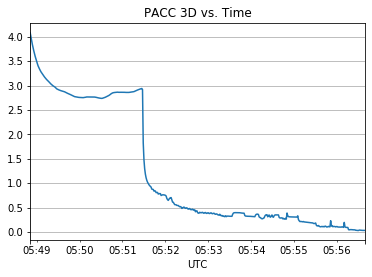

In [36]:
# Substitute "Lat" for your choice of column
col_to_plot = "PACC 3D"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_slice.plot("UTC", col_to_plot, title = col_to_plot+" vs. Time", legend=False, grid=True)

# Get Current Axes
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
#ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
#ax.xaxis_date()

# Uncomment this line to format a latitude axis
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.show()

In [83]:
startTime = "2020-04-23 05:48:50"
endTime = "2020-04-23 05:51:28"
df_before = df_slice[df_slice["UTC"] > startTime]
df_before = df_before[df_before["UTC"] < endTime]

startTime = "2020-04-23 05:51:27"
endTime = "2020-04-23 05:56:40"
df_after = df_slice[df_slice["UTC"] > startTime]
df_after = df_after[df_after["UTC"] < endTime]

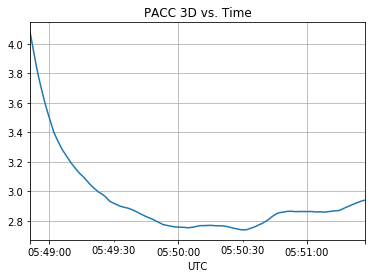

In [84]:
# df.plot is a Pandas # Substitute "Lat" for your choice of column
col_to_plot = "PACC 3D"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_before.plot("UTC", col_to_plot, title = col_to_plot+" vs. Time", legend=False, grid=True)

plt.show()

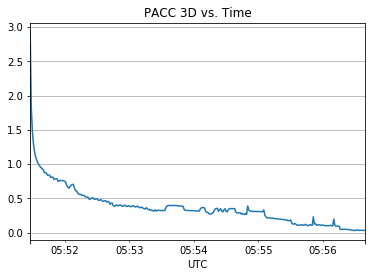

In [85]:
# df.plot is a Pandas # Substitute "Lat" for your choice of column
col_to_plot = "PACC 3D"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_after.plot("UTC", col_to_plot, title = col_to_plot+" vs. Time", legend=False, grid=True)

plt.show()

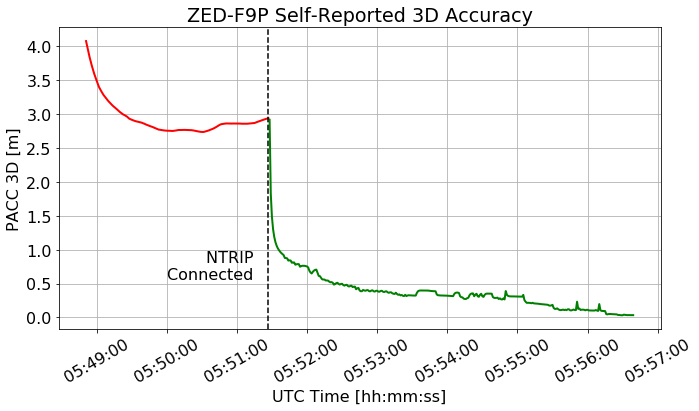

In [113]:
col_to_plot = "PACC 3D"

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(10,6))
plt.title("ZED-F9P Self-Reported 3D Accuracy")
plt.plot(df_before.UTC, df_before[col_to_plot].values, c='r', lw=2)
plt.plot(df_after.UTC, df_after[col_to_plot].values, c='g', lw=2)

ax = plt.gca()

ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

line_loc = datetime.strptime("2020-04-23 05:51:27", "%Y-%m-%d %H:%M:%S")

ax.axvline(x=line_loc, ymin=0, ymax=3.5, c='k', ls="--") 
x_bounds = ax.get_xlim()
ax.annotate(s='NTRIP   \nConnected   ', xy =(line_loc, 1), verticalalignment='top', horizontalalignment='right')

plt.xlabel("UTC Time [hh:mm:ss]")
plt.ylabel("PACC 3D [m]")

plt.grid()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
fig.savefig('ntrip')


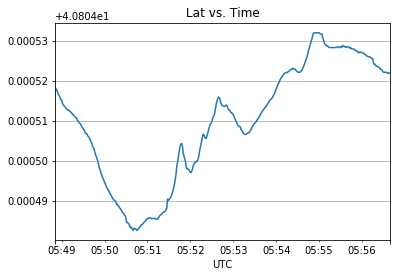

In [39]:
# Substitute "Lat" for your choice of column
col_to_plot = "Lat"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_slice.plot("UTC", col_to_plot, title = col_to_plot+" vs. Time", legend=False, grid=True)

# Get Current Axes
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
#ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
#ax.xaxis_date()

# Uncomment this line to format a latitude axis
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.show()